# Tensorflow Object Detection Setup and Evaluation

## Installation
---

#### Dependencies

- Protobuf 3.0.0
- Python-tk
- Pillow 1.0
- lxml
- tf Slim (which is included in the "tensorflow/models/research/" checkout)
- Jupyter notebook
- Matplotlib
- Tensorflow (>=1.9.0)
- Cython
- contextlib2
- cocoapi

---

#### Repositories

- [TensorFlow Object Detection API Repository](https://github.com/tensorflow/models/tree/master/research/object_detection "TensorFlow Object Detection Repository")
- [TensorFlow Object Detection API Installation Guide](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md "TensorFlow Object Detection Installation.md")
- [TensorFlow Object Detection API Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md "TensorFlow Model Zoo")

The API can be downloaded from the above repository. The GitHub page provides installation instructions for Unix systems. Use the official guide to install on Unix systems. 

This guide will provide instructions on how to install the TensorFlow Object Detection API on Windows.

---

#### TensorFlow Model Zoo Reference Table

The following models have been evaluated and are confirmed to run on a Raspberry Pi Model 3.

The tables below represent the metrics of the models tested on 600 frames of Old Street footage. The table should be used as a reference to help selecting a machine learning model.

| Model Name | Speed | MAE    | Error Std | Mean bias | Relative MAE | 
| :---       | :---  | :---   | :---      | :---      | :---         | 
| ssd_mobilenet_v2_coco | 27ms  | 0.6000 | 0.9393    | 0.5880    | 0.7229       |
| ssd_mobilenet_v1_fpn_ coco | 56ms | 0.5780 | 0.9631 | 0.3500 | 0.6964       |
| ssd_resnet_50_fpn_ coco | 76ms | 0.4980 | 0.8604 | 0.4580 | 0.6000       |
| faster_rcnn_inception_v2_coco | 58ms | 0.8020 | 1.0172 | -0.5580 | 0.9663     |
| faster_rcnn_resnet50_coco | 89ms | 0.7800 | 0.9874 | -0.5560 | 0.9398     |
| faster_rcnn_resnet50_lowproposals_coco | 64ms | 0.4640 | 0.8074 | -0.0780 | 0.5952     |
| faster_rcnn_resnet101_coco | 106ms | 0.6880 | 0.9309 | -0.3120 | 0.8289     |

---

#### 1) Download TensorFlow Object Detection API repository from GitHub

Download or Clone the repository located at https://github.com/tensorflow/models. The TensorFlow Object Detection API requires using the specific directory structure provided in the GitHub repository. 

#### 2) Download pre-trained TensorFlow model from model zoo

Download a pre-trained classifier from The Tensorflow detection model zoo.

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md 

Extract the contents of the downloaded model on to object_detection folder. 

`C:\models\research\object_detection`


#### 3) Set up new Anaconda Virtual Environment and Install necessary packages

Create a new Anaconda Virtual Environment:

`conda create -n ENVNAME`

Activate the Environment:

`conda activate ENVNAME`

Install tensorflow using pip:

`pip install tensorflow` (or `pip install tensorflow-gpu` if using gpu)

Using tensorflow using conda:

`conda install -c conda-forge tensorflow` ( or `conda install -c conda-forge tensorflow-gpu` if using gpu)

Install the other packages:

- `conda install -c anaconda protobuf`
- `pip install pillow`
- `pip install lxml`
- `pip install contextlib2`
- `pip install Cython`
- `pip install jupyter`
- `pip install matplotlib`


#### 4) Configure PYTHONPATH environment variable

PYTHONPATH pointing to tensorflow/models/, tensorflow/models/research/ and tensorflow/models/research/slim need to be created. Point to these directories within your Anaconda Virtual Environment using the following command:

```
(ENVNAME) C:\> set PYTHONPATH=C:\tensorflow\models;C:\tensorflow\models;C:\tensorflow\models\research;C:\tensorflow\models\research\slim`
```
Note: Change this command to work with your directory path. The PYTHONPATH variable is reset every time the virtual environment is deactivated. Repeat this step to configure PYTHONPATH variable each time the environment is reactivated.
DO NOT add PYTHONPATH to your Windows variables, as it will probably break your Anaconda installation.

#### 5) Compile Protobufs and run setup.py

The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. For Windows each .proto file in the \object_detection\protos directory must be called individually. 
In Anaconda prompt navigate to \models\research directory and issue the following command: 

```
protoc --python_out=. .\object_detection\protos\anchor_generator.proto .\object_detection\protos\argmax_matcher.proto .\object_detection\protos\bipartite_matcher.proto .\object_detection\protos\box_coder.proto .\object_detection\protos\box_predictor.proto .\object_detection\protos\eval.proto .\object_detection\protos\faster_rcnn.proto .\object_detection\protos\faster_rcnn_box_coder.proto .\object_detection\protos\grid_anchor_generator.proto .\object_detection\protos\hyperparams.proto .\object_detection\protos\image_resizer.proto .\object_detection\protos\input_reader.proto .\object_detection\protos\losses.proto .\object_detection\protos\matcher.proto .\object_detection\protos\mean_stddev_box_coder.proto .\object_detection\protos\model.proto .\object_detection\protos\optimizer.proto .\object_detection\protos\pipeline.proto .\object_detection\protos\post_processing.proto .\object_detection\protos\preprocessor.proto .\object_detection\protos\region_similarity_calculator.proto .\object_detection\protos\square_box_coder.proto .\object_detection\protos\ssd.proto .\object_detection\protos\ssd_anchor_generator.proto .\object_detection\protos\string_int_label_map.proto .\object_detection\protos\train.proto .\object_detection\protos\keypoint_box_coder.proto .\object_detection\protos\multiscale_anchor_generator.proto .\object_detection\protos\graph_rewriter.proto 
```
This will create a `_pb2.py` file for every `.proto` file in the object_detection\protos folder.

Note: You may be able to use the following command in GitBash or Powersheel to compile the Protobuf libraries:

`protoc object_detection/protos/*.proto --python_out=.`

Next, run the following commands from models\research directory:

`(ENVNAME) C:\models\research> python setup.py build`

`(ENVNAME) C:\models\research> python setup.py install`


#### 6) Testing the Installation
You can test that you have correctly installed the Tensorflow Object Detection API by running the model_builder_test.py file:

`python models/research/object_detection/builders/model_builder_test.py`

Alternatively you can launch and run the example Jupyter Notebook object_detection_tutorial.ipynb

# The TensorFlow Object Detection API and beyond.
---

A good point of entry to understand how the TensorFlow Object Detection API works is by running the provided `object_detection_tutorial.ipynb` notebook. The notebook provides an example of how the API can be used to detect objects on still images.

The code found on this notebook can be adapted for people counting on a series of images or live video feeds. 

See example of how this code was used for vehicle counting here:

https://github.com/ahmetozlu/vehicle_counting_tensorflow/blob/master/vehicle_detection_main.py

---

## Adapting The object_detection_tutorial.ipynb notebook for people counting.

#### Importing Object Detection API utilities

The notebook makes use of the following modules for object classification and visualisations:

```python
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
```

`label_map_util` - to load object labels

The notebook uses the API's utility function: `label_map_util` to return category id's. The label map can be any file that maps an integer to a string label.

`visualization_utils` - to recieve and perform visualizations on images.

Parameters in the visualization_utils.py file can be altered to configure the thresholds of when boundary boxes are drawn on detected objects. To adjust the threshold of boundary boxes change the variable min_score_thresh, which is set to 0.5 by default.

---

#### Downloading Pre-trained Object Detection Model

The notebook provides a neat way of defining, downloading and loading pre-trained TensorFlow Models. 

If using a custom model, set the following block accordingly to the path of your model.

```python
#base path where we will save our models
PATH_TO_OBJ_DETECTION = 'C:/MYFILES/yolo/models/research/object_detection'

# Specify Model To Download. Obtain the model name from the object detection model zoo.
MODEL_NAME = 'ssd_inception_v2_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
```

```python
DESTINATION_MODEL_TAR_PATH = PATH_TO_OBJ_DETECTION+'/data/'+MODEL_FILE
#opener = urllib.request.URLopener()
#opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, DESTINATION_MODEL_PATH)
tar_file = tarfile.open(DESTINATION_MODEL_TAR_PATH)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, PATH_TO_OBJ_DETECTION+'/data')      
```        
---

#### Load frozen (frozen_inference_graph.pb) model into memory

A frozen_inference_graph.pb file is loaded in to memory through the following code. 

```python
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
```

See the following guide for creating your own models.

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/defining_your_own_model.md

---

#### Loading Label map

The tutorial notebook uses the label_map_util utility function to load the default mscoco label map.

The label map for the pre-trained mscoco model can be found in the \models\research\object_detection\data directory. The mscoco label map contains 90 categories each assigned an item id. 

Note: The mscoco label map, maps the id:1 to "person". Use `category_index[i]` where `i` is the id integer to view corresponding  string label.

```python
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
```

See the following guide to create and use your own label maps.

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/using_your_own_dataset.md

---

#### Image to Numpy Array

The below helper code is used to convert images to numpy arrays. This is required for image classification on the API.

```python
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
```
---

#### Setting test image paths

The following block defines the path of the test images and sets the size of output images that will be displayed in the visualizations.

```python
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.png'.format(i)) for i in range(1, 241) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
```
---

#### Object Detection Method

```python

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict
```
The above method takes as input an array of the test image and the TensorFlow graph loaded earlier.

The following variables are defined in the above object detection method.

- `detection_score` - Represents the level of confidence for each object.
- `detection_classes` - Represents the class of the identified object.
- `num_detections` - Number of detections.
- `detection_boxes` - Represents a part of the image where a particular object was detected.

Note: Use these variables to adjust for object detection thresholds.

---

#### Visualization

The vis_util.visualize_boxes_and_labels_on_image_array utility function is used inside a for loop to add boundary boxes on the detected objects.

```python
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
```    

Note: The thresholds for the boundary boxes can be changed in the visualization_utils.py file. The default threshold is 0.5.

#### Counting Detected Objects

The code found in the detection and visualization block can be adapted to show the id and classification of every object detected in a frame. The below code prints out the label entry for every object that scores above a 0.25 threshold.

```python
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    results =[]
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
        
      count = [category_index.get(value) for index,value in enumerate(classes[0]) if scores[0,index] > 0.25]
      
      #print(count)
      results.append(count)


print(results)
```
---

Note: For other examples of counting being implemented in the TensorFlow Object Detection API see the following repository.

https://github.com/ahmetozlu/vehicle_counting_tensorflow

---

## Helpful Frameworks: TensorFlow Object Counting API

https://github.com/ahmetozlu/tensorflow_object_counting_api

The TensorFlow Object Counting API is an open source framework built on top of TensorFlow Object Detection API to make object counting systems.

For an out-of-the-box single-image-people-counting system use the single_image_object_counting.py from the TensorFlow Object Counting API.





# People Count Analysis

The following is a list of possible metrics that can be used to assess an object counting model:

- Mean bias
- Standard deviation of the incurred error
- Mean Average Error (MAE)
- Relative Mean Square Error (RMSE)
- Relative MAE 
- Relative error (definition found in the example_analysis notebook)

Always look at the sign of the bias of the model: it is important to understand whether the model is overcounting (positive bias) or undercounting (negative bias). 

---

Creating Relative error method:

```python
def our_relative_error(true, pred):
    error = np.zeros(len(true))
    for i in np.arange(len(true)):
        if true[i] == 0 and pred[i] == 0:
            error[i] = 0.0
        elif true[i] == 0 and pred[i] != 0:
            error[i] = 1.0
        elif true[i] != 0 and pred[i] == 0:
            error[i] = 1.0
        else:
            error[i] = (true[i] - pred[i])/true[i]
    return error
```
See below for a demonstation of using the the our_relative_error method.

In [10]:
trueCount = [9, 7, 8, 6, 6, 9, 7, 9, 7, 9,
             9, 12, 12, 8, 9, 9, 8, 13, 11, 12,
             11, 9, 9, 6, 5, 5, 4, 5, 5, 6,
             5, 7, 5, 6, 4, 5, 5, 3, 4, 4,
             3, 2, 2, 2, 2, 2, 2, 2, 3, 3,
             4, 4, 5, 5, 6, 6, 7, 6, 4, 5]

predCount = [4, 5, 3, 4, 6, 7, 2, 4, 2, 6, 
             4, 5, 4, 4, 4, 4, 7, 4, 2, 5, 
             5, 4, 6, 4, 4, 4, 3, 3, 5, 5, 
             2, 3, 4, 5, 3, 2, 3, 3, 3, 2,
             1, 1, 1, 3, 3, 2, 2, 2, 3, 2,
             4, 4, 4, 5, 5, 5, 4, 4, 5, 8] 

In [11]:
def our_relative_error(true, pred):
    error = np.zeros(len(true))
    for i in np.arange(len(true)):
        if true[i] == 0 and pred[i] == 0:
            error[i] = 0.0
        elif true[i] == 0 and pred[i] != 0:
            error[i] = 1.0
        elif true[i] != 0 and pred[i] == 0:
            error[i] = 1.0
        else:
            error[i] = (true[i] - pred[i])/true[i]
    return error

Populating the interactive namespace from numpy and matplotlib


[]

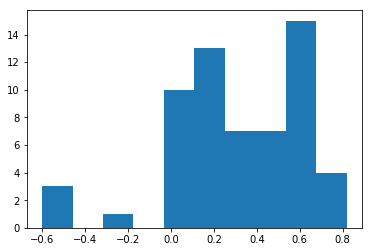

In [12]:
import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

%matplotlib inline
%pylab inline

rel_err = our_relative_error(trueCount,predCount)

numbins = 22

# plt.hist(rel_err, bins = -0.05*np.ones(numbins) + np.linspace(-1, 1.05, numbins))
plt.hist(rel_err)
plt.plot()

# Video Processing

The Object Detection API can be used on live video footage, review the following repository for an example of such implementation. https://github.com/ahmetozlu/vehicle_counting_tensorflow. 
The above example uses OpenCV to read a video input, which it then converts to images for classification, adds boundary boxes to images, and finally joins the images back in sequence to create a video.

## FFMPEG video processing

It may be the case that the video footage available needs pre-processing. Cropping, as well as resizing or rotating the video,  may be necessary to adjust the field of view, 

Many packages and utilities can be used to facilitate the above operations, pick the tools what you know.

In this guide I will go through the use cases of ffmpeg to process and convert video to still images. OpenCV is another recommended option.


#### To output one image every second:

`ffmpeg -i input.mp4 -vf fps=1 output%d.png`

#### To resize an image:

`ffmpeg input.jpg -vf scale=640:-1 output.jpg`

#### To resize images in bulk run the following bash script:

```bash
for i in *.png;
 do name=`echo $i | cut -d'.' -f1`;
 echo $name;
 ffmpeg -i $i -s 600x800 -c:a copy $name.jpg;
done
```

# References

https://github.com/ahmetozlu/vehicle_counting_tensorflow
https://github.com/ahmetozlu/tensorflow_object_counting_api
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/using_your_own_dataset.md
https://github.com/ahmetozlu/vehicle_counting_tensorflow/blob/master/vehicle_detection_main.py
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md
https://github.com/tensorflow/models/tree/master/research/object_detection